Topic: Challenge Set 5  
Subject: Linear Splitting
Date: 01/20/2018  
Name: Laura Chen  
Worked with: N/A

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import patsy


In [7]:
df=pd.read_pickle('charities.pkl')

Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [15]:
y, X = patsy.dmatrices('perc_program_exp ~ perc_fundraising_exp + offers_services + tpscore + gov_funded', data=df, return_type="dataframe")

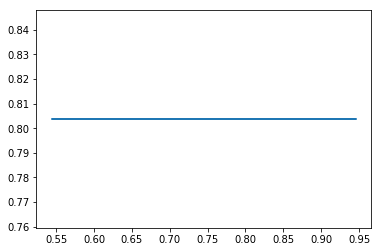

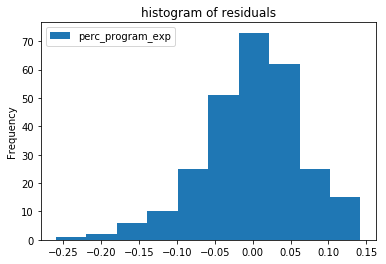

In [31]:
lr=LinearRegression()
x=X.Intercept.values.reshape(-1, 1)
fit=lr.fit(x,y)

y_pred=fit.predict(x)

plt.plot(y,y_pred)

res=y-y_pred
res.plot(kind='hist',title="histogram of residuals")

Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [39]:
x=X[['Intercept','perc_fundraising_exp']]

lr2=LinearRegression()
fit2=lr2.fit(x,y)


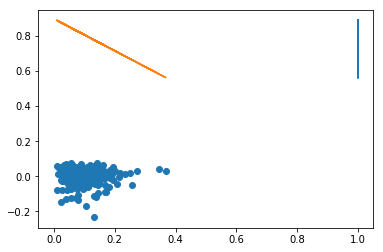

In [57]:
y_pred=fit2.predict(x)

plt.plot(x,y_pred)
res=y-y_pred
plt.scatter(x.perc_fundraising_exp,res)



This model is underfitted.

Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [58]:
x=X[['Intercept','offers_services']]

lr3=LinearRegression()
fit3=lr3.fit(x,y)

y_pred=fit3.predict(x)

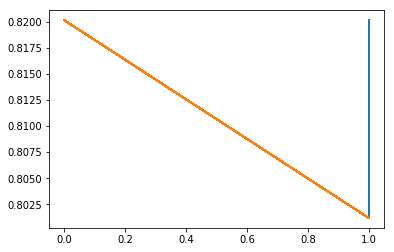

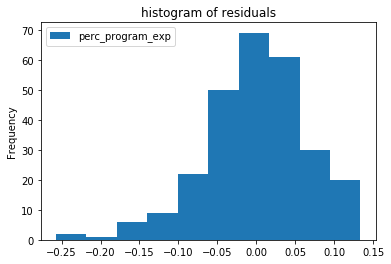

In [62]:
plt.plot(x,y_pred)

res=y-y_pred
res.plot(kind='hist',title="histogram of residuals")

Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [78]:
lr=LinearRegression()
fit=lr.fit(X,y)

In [80]:
fit.score(X,y)

0.55351895375755478

Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [68]:
lr=LinearRegression()
fit=lr.fit(X_train,y_train)

In [69]:
y_pred=fit.predict(X_test)

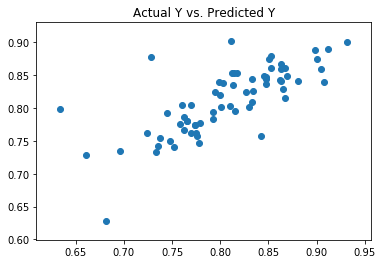

In [77]:
plt.scatter(y_test.values,y_pred)
plt.title('Actual Y vs. Predicted Y')